In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np



df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataMining/framingham-2.csv");

df = df.dropna()
print(df.shape);
print(df)


# Display the numerical dataset
print(list(df.columns))
print(len(df.columns))







(3656, 16)
      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4231     1   58        3.0              0         0.0     0.0   
4232     1   68        1.0              0         0.0     0.0   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    2

**1 Is the response variable (TenYearCHD) unbalanced? If so,**.

a. What are the implications of unbalanced data?

b. How can you solve this problem?

c. Implement the solution in 1.b and find a parsimonious logistic regression model.Check if the model provides an adequate fit for the data.

d. Interpret the estimated coefficient associated to glucose.

**2.** Train the model with 70% of the data and with the remaining 30% calculate the accuracy,sensitivity, and specificity of the model. Comment on your findings.

**3.** Repeat question 2 using principal components as predictors. Compare the models.


In [ ]:
# Count occurrences of each class
class_counts = df['TenYearCHD'].value_counts()

# Calculate proportions
class_proportions = class_counts / class_counts.sum()

print("Class Counts:")
print(class_counts)
print("\nClass Proportions:")
print(class_proportions)

Class Counts:
0    3099
1     557
Name: TenYearCHD, dtype: int64

Class Proportions:
0    0.847648
1    0.152352
Name: TenYearCHD, dtype: float64


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 假设您的数据加载到名为'df'的DataFrame中
# 'TenYearCHD'是表示响应变量的列

# 对响应变量和特征进行切分
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# 使用SMOTE过采样技术生成合成样本 (从少数类中随机复制样本或生成合成样本，以增加其表示)
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

print(y_resampled)
class_counts = y_resampled.value_counts()
print(class_counts)

# 将数据集切分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 训练随机森林分类器
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = rf_classifier.predict(X_test)

# 输出分类报告
print(classification_report(y_test, y_pred))

#combin X_resampled,y_resampled
df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['TenYearCHD'])], axis=1)


0       0
1       0
2       0
3       1
4       0
       ..
6193    1
6194    1
6195    1
6196    1
6197    1
Name: TenYearCHD, Length: 6198, dtype: int64
0    3099
1    3099
Name: TenYearCHD, dtype: int64
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       616
           1       0.92      0.89      0.91       624

    accuracy                           0.91      1240
   macro avg       0.91      0.91      0.91      1240
weighted avg       0.91      0.91      0.91      1240



In [ ]:

response_count = df.groupby("TenYearCHD")["TenYearCHD"].count();
print(response_count);

print("Percentage of 0s:", 100*response_count[0]/np.sum(response_count));

print("Percentage of 1s:", 100*response_count[1]/np.sum(response_count));

import statsmodels.api as sm;

model = sm.GLM.from_formula("TenYearCHD ~ C(male)+ age + C(education) + C(currentSmoker) + cigsPerDay+ C(BPMeds) +C(prevalentHyp)+C(prevalentStroke)+C(diabetes)  + sysBP+diaBP+BMI+heartRate+glucose"
      ,family=sm.families.Binomial(), data=df);

result = model.fit();
print(result.summary());


TenYearCHD
0    3099
1    3099
Name: TenYearCHD, dtype: int64
Percentage of 0s: 50.0
Percentage of 1s: 50.0


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


KeyboardInterrupt: 

In [ ]:

model = sm.GLM.from_formula("TenYearCHD ~ C(male)+ age + sysBP + glucose"
      ,family=sm.families.Binomial(), data=df);

model = sm.GLM.from_formula("TenYearCHD ~ age + sysBP + glucose"
      ,family=sm.families.Binomial(), data=df);

result = model.fit();
print(result.summary());

In [ ]:
dev = result.deviance; # Residual Deviance
df_resid = result.df_resid; # Degree of freedoms of Residuals
import scipy;
pvalue = 1 - scipy.stats.chi2.cdf(dev, df_resid); # p-value
print(pvalue);

In [ ]:
result2 = model.fit(scale="X2");
print(result2.summary());

                 Generalized Linear Model Regression Results                  
Dep. Variable:             TenYearCHD   No. Observations:                 6198
Model:                            GLM   Df Residuals:                     6194
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0052
Method:                          IRLS   Log-Likelihood:                -3871.6
Date:                Wed, 20 Mar 2024   Deviance:                       7743.1
Time:                        22:07:13   Pearson chi2:                 6.23e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1280
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.9229      0.226    -26.252      0.0

In [ ]:

print(df.shape)

(6198, 16)


In [ ]:



# The data is not dramatically unbalanced.
X = df.iloc[:, 0:-1]; # predictors

y = df['TenYearCHD']; # response
# We define training and testing sets.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0,shuffle=True);
df_train = pd.concat([X_train, y_train], axis = 1);


model = sm.GLM.from_formula("TenYearCHD ~ age + sysBP + glucose",family=sm.families.Binomial(), data=df_train);
result = model.fit();
# Predictions
predictions = result.predict(X_test);


predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions];
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, predictions_nominal)
print("Confusion matrix: ", cm);


print("Acuraccy: ", round(np.sum(np.diagonal(cm))/np.sum(cm),3));


print("Sensitivity: ", round(cm[1,1]/np.sum(cm[1,:]),3));


print("Specificity: ", round(cm[0,0]/np.sum(cm[0,:]),3));


print(classification_report(y_test, predictions_nominal, digits = 3));





Confusion matrix:  [[602 327]
 [341 590]]
Acuraccy:  0.641
Sensitivity:  0.634
Specificity:  0.648
              precision    recall  f1-score   support

           0      0.638     0.648     0.643       929
           1      0.643     0.634     0.639       931

    accuracy                          0.641      1860
   macro avg      0.641     0.641     0.641      1860
weighted avg      0.641     0.641     0.641      1860



In [ ]:

print(df.shape)

(6198, 16)


[[-1.9559184  -1.05495356 -0.09959506 ... -0.08893532  0.06034178
   0.3138873 ]
 [-0.13057151 -1.0909289  -0.19756974 ...  0.07840679  0.11379181
  -0.07245031]
 [-1.4853772   1.31232401  0.10932073 ...  0.18590303 -0.18118968
   0.11718983]
 ...
 [ 1.34225643 -0.24948439 -0.66322645 ...  0.13657953  0.16587068
  -0.65246382]
 [ 1.58152729  0.21620133 -0.23011579 ... -0.45383241  0.23235865
  -0.09048837]
 [ 0.02526223 -1.54143885 -0.31576813 ... -0.09687718  0.09809745
  -0.23918219]]
[0.22029081 0.34654411 0.46080881 0.53280716 0.60408442 0.67162679
 0.7386903  0.79739426 0.84989663 0.8961108  0.93500906 0.96009259
 0.97638762 0.98981666 1.        ]


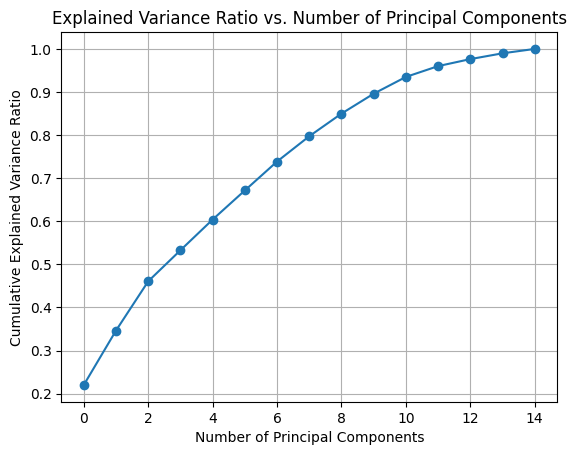

SDs: 
  male                0.49
age                 8.24
education           0.96
currentSmoker       0.50
cigsPerDay         11.95
BPMeds              0.18
prevalentStroke     0.06
prevalentHyp        0.47
diabetes            0.18
totChol            44.53
sysBP              23.85
diaBP              12.52
BMI                 3.83
heartRate          11.46
glucose            31.83
dtype: float64
Variability explained by PCs: 
 [0.22029081 0.34654411 0.46080881 0.53280716 0.60408442 0.67162679
 0.7386903  0.79739426 0.84989663 0.8961108  0.93500906 0.96009259
 0.97638762 0.98981666 1.        ]
Number of variables:  15


<Figure size 640x480 with 0 Axes>

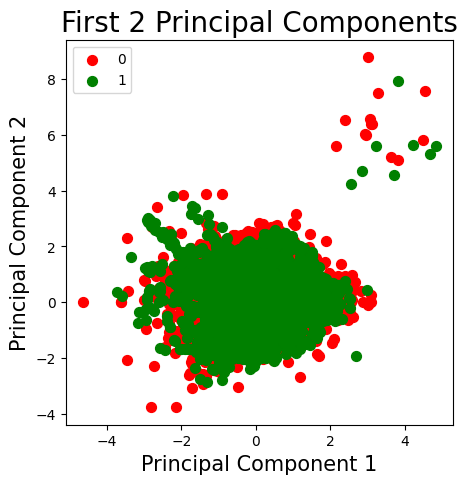

In [ ]:
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

scaler = StandardScaler(); # creating object
X = df.iloc[:, 0:-1]; # predictors
Y = df['TenYearCHD']; # response

fitted = scaler.fit(X);
dfc_std = fitted.transform(X);

# In a single line
#dfc_std = StandardScaler().fit_transform(dfc)

from sklearn.decomposition import PCA
pca = PCA(n_components=dfc_std.shape[1]); # All the possible components
principalComponents = pca.fit_transform(dfc_std);
print(principalComponents)
# Explained variance ratio
explained_variance_ratio =np.cumsum(pca.explained_variance_ratio_)

print(explained_variance_ratio)

# Plot explained variance ratio
plt.plot(explained_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.grid(True)
plt.show()


principalDf = pd.DataFrame(data = principalComponents[:, :10], columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
finalDf = pd.concat([principalDf, df['TenYearCHD']], axis = 1)# axis{0/’index’, 1/’columns’}

plt.clf() # clean plot
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) # add_subplot(nrows, ncols, index, **kwargs)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('First 2 Principal Components', fontsize = 20)

targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['TenYearCHD'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)

# a) Yes, since the magnitude of the variability is quite different.  For instance, the SD for total cholesterol is 44,
#    whereas the one for BMI is 4.07
print("SDs: \n ", round(np.std(X),2))

# b) The first 6-7 principal components are enough to capture most of the variability of these variables.
#    89.8% and 97.7%, respectively
#    Since we have 8 continuous variables, the reduction is not that significant, but it can still speed up the analysis.
print("Variability explained by PCs: \n", np.cumsum(pca.explained_variance_ratio_));
print("Number of variables: ", dfc_std.shape[1])

# c) There is not a clear difference between the genders, but we also have to consider that the first 2 components only
#    capture 45% of the variability of the data.






In [ ]:


print("finalDf =============",finalDf.shape)

#copy from PCA
df = finalDf
print(finalDf.shape)
X = df.iloc[:, 0:-1]; # predictors

y = df['TenYearCHD']; # response
# We define training and testing sets.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0,shuffle=True);
df_train = pd.concat([X_train, y_train], axis = 1);

print(df_train)

model = sm.GLM.from_formula("TenYearCHD ~ PC1 + PC2 + PC3+ PC4+ PC5+ PC6+ PC7+ PC8+ PC9+ PC10",family=sm.families.Binomial(), data=df_train);
#model = sm.GLM.from_formula("TenYearCHD ~ PC1 + PC2 +    PC4+ PC5+ PC6+ PC7+ PC8  ",family=sm.families.Binomial(), data=df_train);
result = model.fit();

 #check the model is good or not
print(result.summary())

# Predictions
predictions = result.predict(X_test);

predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions];
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, predictions_nominal)
print("Confusion matrix: ", cm);


print("Acuraccy: ", round(np.sum(np.diagonal(cm))/np.sum(cm),3));


print("Sensitivity: ", round(cm[1,1]/np.sum(cm[1,:]),3));


print("Specificity: ", round(cm[0,0]/np.sum(cm[0,:]),3));


print(classification_report(y_test, predictions_nominal, digits = 3));


finalDf ============= (6198, 11)
(6198, 11)
           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
4561  1.722763  0.604376 -0.934273 -0.956608  0.870714 -1.086188 -0.090708   
4395  2.292307 -0.431825  0.275102 -1.108399  0.174105  0.123299  0.541109   
3817  0.276065  0.090110  5.351932  0.155456  1.346070 -1.070084 -0.113651   
2584 -1.515170  1.329744  0.386278  0.676985 -0.437203  0.321003 -0.512682   
1419  1.553059  0.575467 -0.894297  0.481103 -0.454208  0.360038 -0.957102   
...        ...       ...       ...       ...       ...       ...       ...   
4931  0.848213 -1.502238 -0.716029  1.331504 -0.050592 -0.060593  0.029873   
3264 -0.701663 -0.627206 -0.104663  0.688289  0.280510 -1.050206  0.718717   
1653 -1.957561  0.417725  0.320695 -0.227580  1.412455  1.048676 -2.586273   
2607 -1.171533 -1.163905  0.097213 -1.495832 -1.294164 -0.439036  2.038501   
2732  1.434535 -0.231005 -0.684123  1.977612 -0.001250 -0.633772 -0.098210   

           PC8     

model = sm.GLM.from_formula("TenYearCHD ~ PC1 + PC2 +    PC4+ PC5+ PC6+ PC7+ PC8  ",family=sm.families.Binomial(), data=df_train);

Confusion matrix:  [[589 340]
 [329 602]]
Acuraccy:  0.64
Sensitivity:  0.647
Specificity:  0.634
              precision    recall  f1-score   support

           0      0.642     0.634     0.638       929
           1      0.639     0.647     0.643       931

    accuracy                          0.640      1860
   macro avg      0.640     0.640     0.640      1860
weighted avg      0.640     0.640     0.640      1860